In [ ]:
import pandas as pd
df = pd.read_csv('/content/MSFT (2).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9594,2024-04-09,426.440002,427.739990,421.619995,426.279999,426.279999,12512300
9595,2024-04-10,422.190002,424.029999,419.700012,423.260010,423.260010,16216600
9596,2024-04-11,425.820007,429.369995,422.359985,427.929993,427.929993,17966400
9597,2024-04-12,424.049988,425.179993,419.769989,421.899994,421.899994,19232100


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9594,2024-04-09,426.279999
9595,2024-04-10,423.260010
9596,2024-04-11,427.929993
9597,2024-04-12,421.899994


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9594    2024-04-09
9595    2024-04-10
9596    2024-04-11
9597    2024-04-12
9598    2024-04-15
Name: Date, Length: 9599, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9594,2024-04-09,426.279999
9595,2024-04-10,423.260010
9596,2024-04-11,427.929993
9597,2024-04-12,421.899994


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9594   2024-04-09
9595   2024-04-10
9596   2024-04-11
9597   2024-04-12
9598   2024-04-15
Name: Date, Length: 9599, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-04-09,426.279999
2024-04-10,423.260010
2024-04-11,427.929993


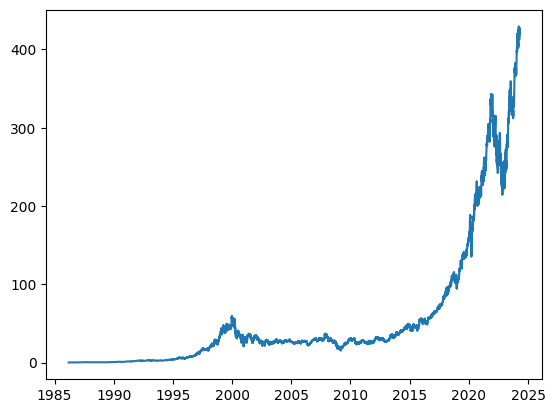

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

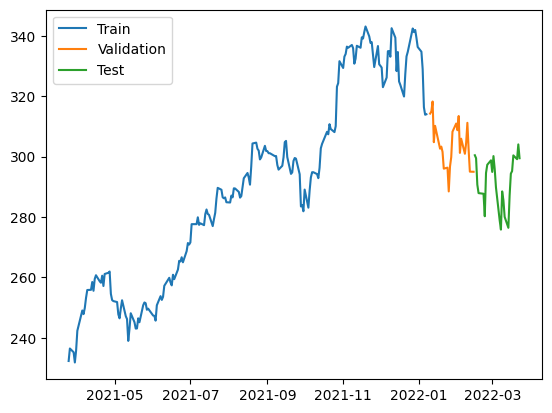

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 136ms/step - loss: 84765.0234 - mean_absolute_error: 289.4044 - val_loss: 92505.3906 - val_mean_absolute_error: 304.0598
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 84572.2422 - mean_absolute_error: 289.0694 - val_loss: 92275.6328 - val_mean_absolute_error: 303.6818
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 84323.8828 - mean_absolute_error: 288.6397 - val_loss: 91941.1406 - val_mean_absolute_error: 303.1306
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 83973.3125 - mean_absolute_error: 288.0336 - val_loss: 91505.7422 - val_mean_absolute_error: 302.4116
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 83530.1406 - mean_absolute_error: 287.2660 - val_loss: 91007.3438 - val_mean_absolute_error: 301.5864
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 83031.2969 - mean_absolute_error: 286.3947 - val_loss: 90

7/7 [==============================] - 0s 3ms/step


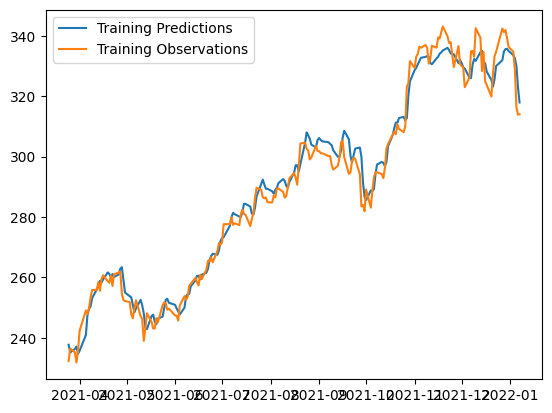

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


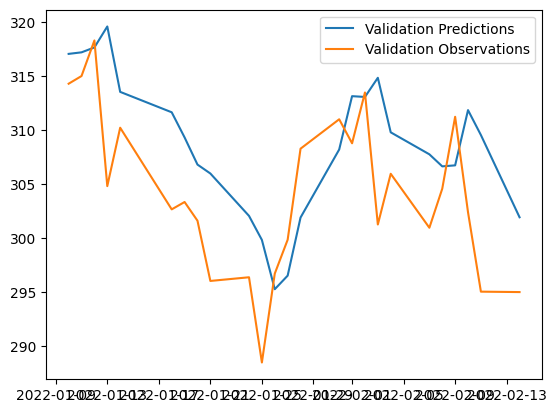

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 18ms/step


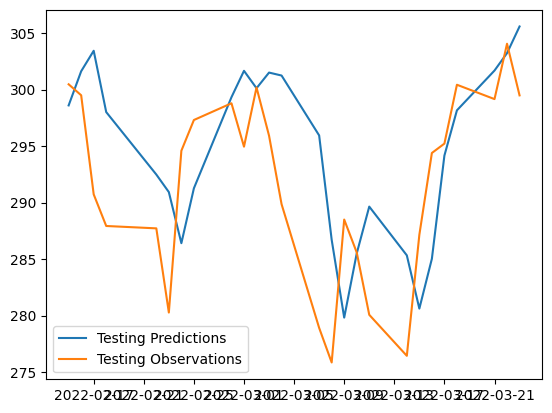

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

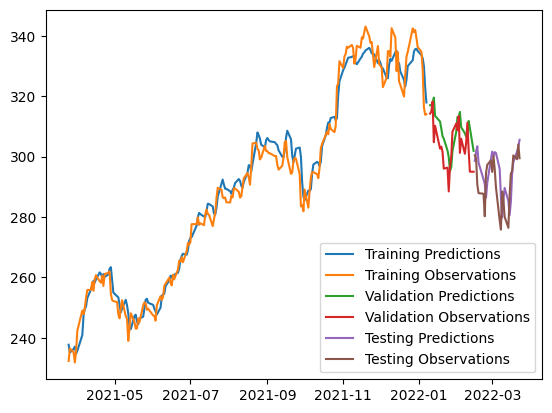

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


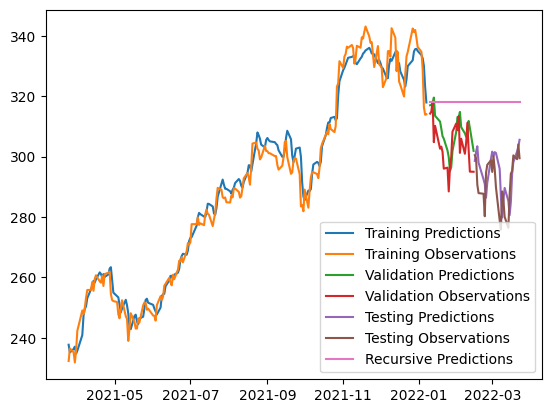

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
y_train

array([232.34, 236.48, 235.24, 231.85, 235.77, 242.35, 249.07, 247.86,
       249.9 , 253.25, 255.85, 255.91, 258.49, 255.59, 259.5 , 260.74,
       258.74, 258.26, 260.58, 257.17, 261.15, 261.55, 261.97, 254.56,
       252.51, 252.18, 251.86, 247.79, 246.47, 249.73, 252.46, 247.18,
       246.23, 239.  , 243.03, 248.15, 245.18, 243.08, 243.12, 246.48,
       245.17, 250.78, 251.72, 251.49, 249.31, 249.68, 247.4 , 247.3 ,
       245.71, 250.79, 253.81, 252.57, 253.59, 257.24, 257.89, 259.89,
       258.36, 257.38, 260.9 , 259.43, 262.63, 265.51, 265.27, 266.69,
       265.02, 268.72, 271.4 , 270.9 , 271.6 , 277.65, 277.66, 279.93,
       277.42, 277.94, 277.32, 280.98, 282.51, 281.03, 280.75, 277.01,
       279.32, 281.4 , 286.14, 289.67, 289.05, 286.54, 286.22, 286.5 ,
       284.91, 284.82, 287.12, 286.51, 289.52, 289.46, 288.33, 286.44,
       286.95, 289.81, 292.85, 294.6 , 293.08, 290.73, 296.77, 304.36,
       304.65, 302.62, 302.01, 299.09, 299.72, 303.59, 301.88, 301.83,
      

Training MSE: 2.59517570737213
Validation MSE: 50.198736490924254
Test MSE: 39.253706630696236


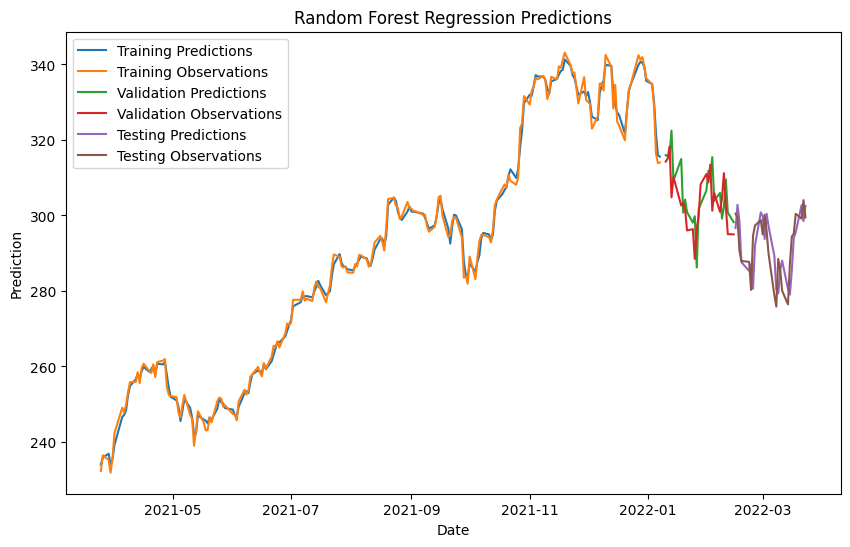

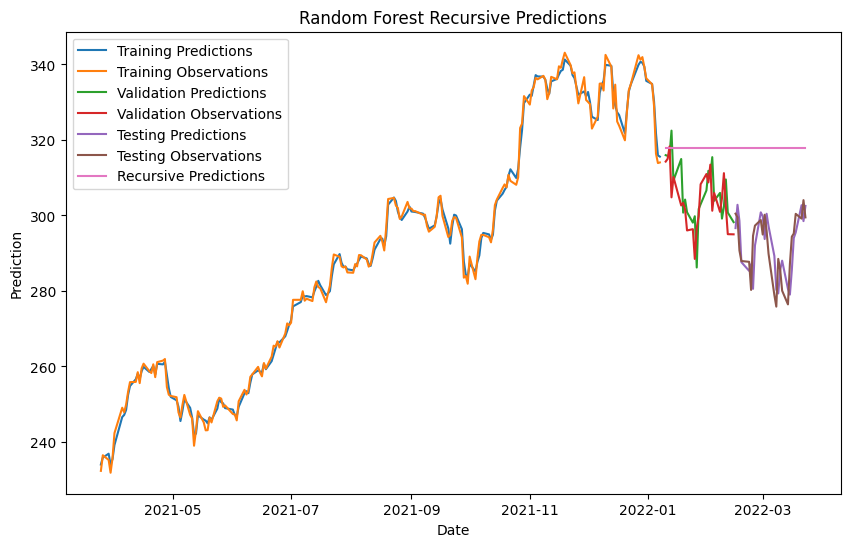

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt




n_samples_train, sequence_length_train, n_features_train = X_train.shape
X_train_reshaped = X_train.reshape(n_samples_train, sequence_length_train * n_features_train)

n_samples_val, sequence_length_val, n_features_val = X_val.shape
X_val_reshaped = X_val.reshape(n_samples_val, sequence_length_val * n_features_val)

n_samples_test, sequence_length_test, n_features_test = X_test.shape
X_test_reshaped = X_test.reshape(n_samples_test, sequence_length_test * n_features_test)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)


regressor.fit(X_train_reshaped, y_train)


train_predictions = regressor.predict(X_train_reshaped)
val_predictions = regressor.predict(X_val_reshaped)
test_predictions = regressor.predict(X_test_reshaped)


train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label="Training Predictions")
plt.plot(dates_train, y_train, label="Training Observations")
plt.plot(dates_val, val_predictions, label="Validation Predictions")
plt.plot(dates_val, y_val, label="Validation Observations")
plt.plot(dates_test, test_predictions, label="Testing Predictions")
plt.plot(dates_test, y_test, label="Testing Observations")
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Random Forest Regression Predictions')
plt.legend()
plt.show()


recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])

    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction


plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label="Training Predictions")
plt.plot(dates_train, y_train, label="Training Observations")
plt.plot(dates_val, val_predictions, label="Validation Predictions")
plt.plot(dates_val, y_val, label="Validation Observations")
plt.plot(dates_test, test_predictions, label="Testing Predictions")
plt.plot(dates_test, y_test, label="Testing Observations")
plt.plot(recursive_dates, recursive_predictions, label="Recursive Predictions")
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Random Forest Recursive Predictions')
plt.legend()
plt.show()


Training MSE: 61.447504764160804
Validation MSE: 39.32591023245478
Test MSE: 52.31898429528935
Training R^2: 0.9391685380380477
Validation R^2: 0.2575750350497643
Test R^2: 0.20425162688838094


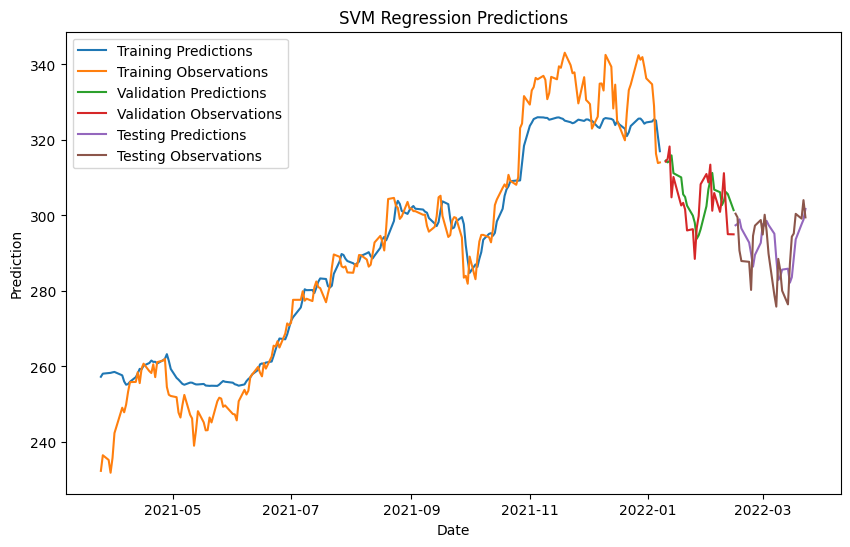

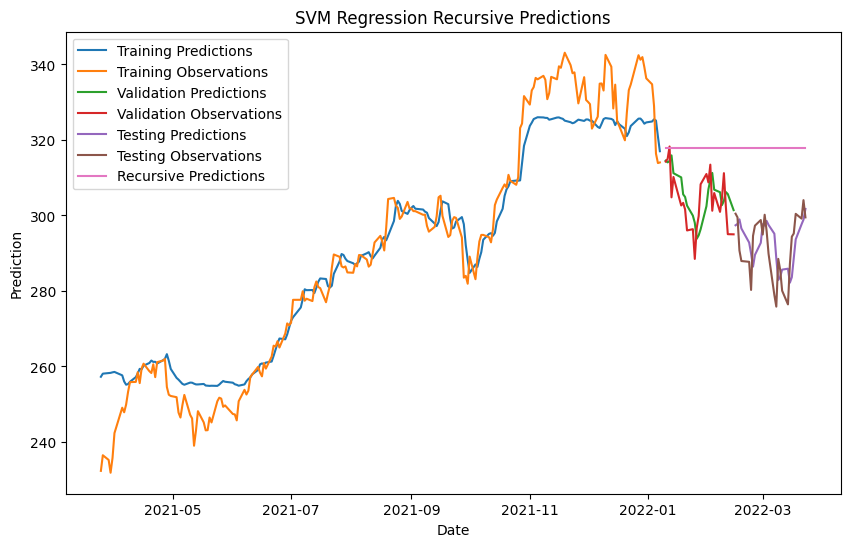

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt


n_samples_train, sequence_length_train, n_features_train = X_train.shape
X_train_reshaped = X_train.reshape(n_samples_train, sequence_length_train * n_features_train)

n_samples_val, sequence_length_val, n_features_val = X_val.shape
X_val_reshaped = X_val.reshape(n_samples_val, sequence_length_val * n_features_val)

n_samples_test, sequence_length_test, n_features_test = X_test.shape
X_test_reshaped = X_test.reshape(n_samples_test, sequence_length_test * n_features_test)


svm_regressor = SVR(kernel='rbf')


svm_regressor.fit(X_train_reshaped, y_train)


train_predictions = svm_regressor.predict(X_train_reshaped)
val_predictions = svm_regressor.predict(X_val_reshaped)
test_predictions = svm_regressor.predict(X_test_reshaped)


train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


train_r2 = r2_score(y_train, train_predictions)
val_r2 = r2_score(y_val, val_predictions)
test_r2 = r2_score(y_test, test_predictions)


print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)


print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)
print("Test R^2:", test_r2)


plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label="Training Predictions")
plt.plot(dates_train, y_train, label="Training Observations")
plt.plot(dates_val, val_predictions, label="Validation Predictions")
plt.plot(dates_val, y_val, label="Validation Observations")
plt.plot(dates_test, test_predictions, label="Testing Predictions")
plt.plot(dates_test, y_test, label="Testing Observations")
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('SVM Regression Predictions')
plt.legend()
plt.show()


recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])

    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction


plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label="Training Predictions")
plt.plot(dates_train, y_train, label="Training Observations")
plt.plot(dates_val, val_predictions, label="Validation Predictions")
plt.plot(dates_val, y_val, label="Validation Observations")
plt.plot(dates_test, test_predictions, label="Testing Predictions")
plt.plot(dates_test, y_test, label="Testing Observations")
plt.plot(recursive_dates, recursive_predictions, label="Recursive Predictions")
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('SVM Regression Recursive Predictions')
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


knn_regressor = KNeighborsRegressor()


knn_regressor.fit(X_train_reshaped, y_train)


train_predictions = knn_regressor.predict(X_train_reshaped)
val_predictions = knn_regressor.predict(X_val_reshaped)
test_predictions = knn_regressor.predict(X_test_reshaped)


train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)


Training MSE: 13.056899
Validation MSE: 39.286602
Test MSE: 51.268063


Training MSE: 0.0
Validation MSE: 72.19829669546336
Test MSE: 58.8981107977004


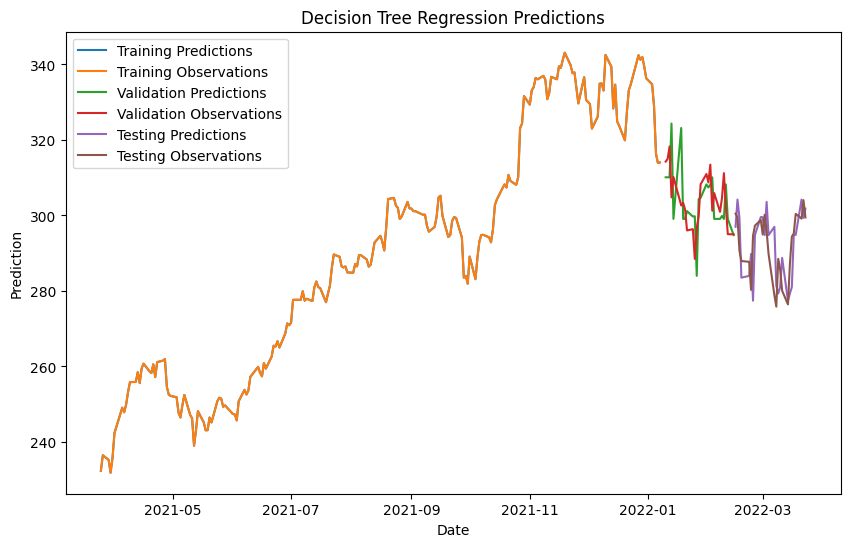

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt




n_samples_train, sequence_length_train, n_features_train = X_train.shape
X_train_reshaped = X_train.reshape(n_samples_train, sequence_length_train * n_features_train)

n_samples_val, sequence_length_val, n_features_val = X_val.shape
X_val_reshaped = X_val.reshape(n_samples_val, sequence_length_val * n_features_val)

n_samples_test, sequence_length_test, n_features_test = X_test.shape
X_test_reshaped = X_test.reshape(n_samples_test, sequence_length_test * n_features_test)


tree_regressor = DecisionTreeRegressor()


tree_regressor.fit(X_train_reshaped, y_train)


train_predictions = tree_regressor.predict(X_train_reshaped)
val_predictions = tree_regressor.predict(X_val_reshaped)
test_predictions = tree_regressor.predict(X_test_reshaped)


train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)


plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions, label="Training Predictions")
plt.plot(dates_train, y_train, label="Training Observations")
plt.plot(dates_val, val_predictions, label="Validation Predictions")
plt.plot(dates_val, y_val, label="Validation Observations")
plt.plot(dates_test, test_predictions, label="Testing Predictions")
plt.plot(dates_test, y_test, label="Testing Observations")
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Decision Tree Regression Predictions')
plt.legend()
plt.show()
